**<h1>Flower Classification with Tensorflow | Keras</h1>**

# <strong>Pendahuluan</strong>

<h2>Dataset</h2>

<p>Dataset ini berisi 2500 gambar bunga. Pengumpulan data ini diambil dari datasets kaggle.com. Dataset ini kami gunakan untuk mengenali bunga yang terdapat didalam foto.</p>

<h2>Isi</h2>

<p>Gambar-gambar tersebut dibagi menjadi lima kelas: daisy, tulip, rose, sunflower, dandelion.
Untuk setiap kelas ada sekitar 500 foto. Foto tidak beresolusi tinggi. Setiap gambar berukuran sekitar 320x240 piksel. Foto tidak direduksi menjadi satu ukuran yang sama, tetapi memiliki proporsi yang berbeda-beda!</p>

# <strong>Mempersiapkan datasets dan packages yang dibutuhkan</strong>

<h2>Mengimpor <em>packages</em> yang diperlukan dalam persiapan datasets</h2>

<p>Step-by-step</p>

In [ ]:
import os

<h2>Membuat data direktori dan memeriksa setiap folder, untuk melihat jenis bunga apa yang tersedia<h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_dir = '../content/drive/MyDrive/flowers'
print(os.listdir(data_dir))

['sunflower', 'rose', 'tulip', 'dandelion', 'daisy']


# **Data Preparing**

<h2>Mengimpor <em>packages</em> yang diperlukan dalam preprocessing datasets</h2>

<p>Step-by-step</p>

In [ ]:
import cv2
import numpy as np

In [ ]:
categories = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip'] #categories]

<h2>Buat dataset baru dengan <strong>merubah color image</strong> dan <strong>meresize ukuran gambar menjadi 224px</strong>. Perbaharui dataset lama dan kembalikan lagi ke <em>dataset</em> yang baru</h2> 

In [ ]:
data = []

def make_data():
  for category in categories:
      path = os.path.join(data_dir, category) # combined path and categories
      label = categories.index(category)

      for img in os.listdir(path):
        image_path = os.path.join(path, img)

        try:
          image = cv2.imread(image_path, cv2.IMREAD_COLOR) # color image array
          image = cv2.resize(image, (100,100)) # resize
          data.append([image, label])
        except Exception as e: # exception
          print(e)
  return np.array(data) # return array

<h2>Membuat <strong>fungsi baru</strong> dari dataset yang diperbaharui</h2>

In [ ]:
data = make_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# **Data Visualization**

<h2>Mengimport <em>packages</em> <strong>seaborn</strong> untuk memvisualisasikan setiap kelas dari datasets yang kita miliki</h2>

In [ ]:
import seaborn as sns

<h2>Menggunakan <strong>seaborn</strong> untuk memvisualisasikan setiap kelas</h2> 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


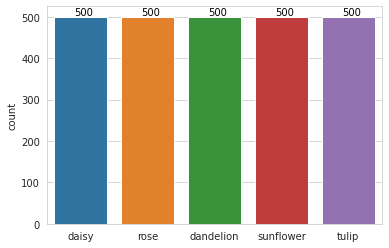

In [ ]:
# visualize each class 
l = []
for i in data:
    l.append(categories[i[1]])
sns.set_style('whitegrid')
countplot = sns.countplot(l)

for p in countplot.patches:
    countplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()+0.1), ha='center', va='bottom', color= 'black') # show the count no.

<h2>Mengimpor <em>packages</em> <strong>matplotlib.pyplot</strong> untuk memvisualisasikan image</h2>

In [ ]:
import matplotlib.pyplot as plt # install matplotlib.pyplot

<h2>Kita lakukan <strong>shuffle data</strong>, tujuannya untuk melatih data secara random. karena tidak mungkin cuma ada sebagian kategori yang ada didalam data train...</h2>

In [ ]:
import random
random.shuffle(data) # shuffle data secara random

<h2><strong>Mempratinjau gambar</strong>, tujuannya untuk mengetahui apakah setiap kategori sudah teracak</h2>

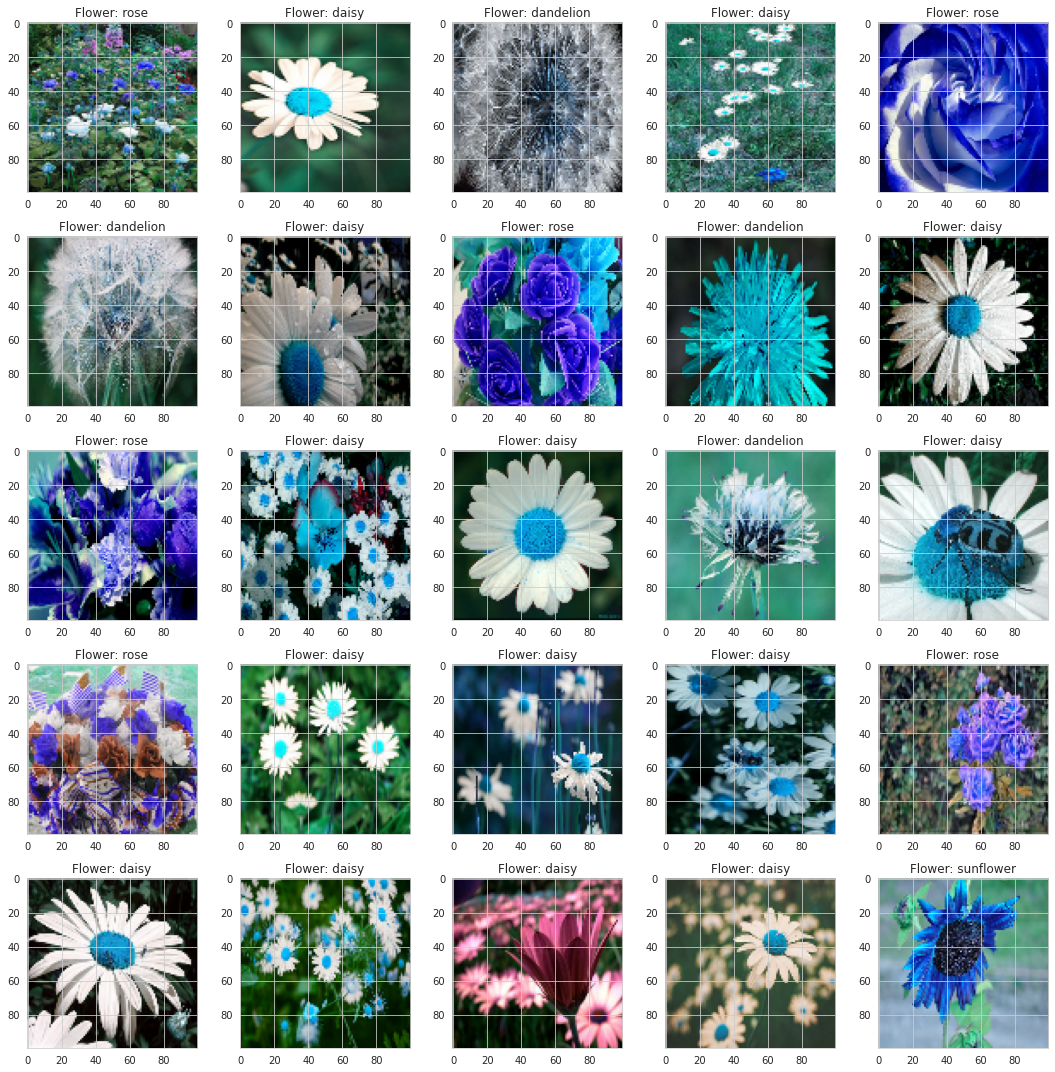

In [ ]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+categories[data[l][1]])
        plt.tight_layout()
plt.show()

# **Data Preprocessing**

<h2>Pisahkan data dan label untuk data <b>train</b> dan <b>test</b></h2>

In [ ]:
# pisahkan item dan label
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

<h2><b>Normalisasi data</b>, tujuannya untuk mengurangi redundansi dan meningkatkan integritas data.</h2>

In [ ]:
# Normalisasi data
x = np.array(x) / 255

<h2>Transformasi data</h2>

In [ ]:
# Membentuk kembali data dari 1-D menjadi 3-D seperti
x = x.reshape(-1, 100, 100, 3)
y = np.array(y)

<h2>Mengubah label menggunakan <em>LabelBinarizer</em>, tujuannya untuk memberikan label [0..1] agar lebih mudah</h2>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# **Modelling Data**

<h2>Mengimport train_test_split dari scikit.learn

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

<h2>Split data train dan data test, dengan perbandingan data train 80:20

In [ ]:
# training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

# **Membangun model dan melatih dataset dengan Convolutional Neural Network (CNN)**

<h2>Mengimport <em>packages</em> yang diperlukan dalam model CNN</h2>

In [ ]:
# import tensorflow
import tensorflow as tf 
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
# building a linear stack of layers with the sequential model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(x_train.shape[1:])))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

# compiling the sequential model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

<h2>Menyesuaikan dengan set Pelatihan dan membuat prediksi pada set Validasi dengan melatih model (epocs) sebanyak 10x.</h2> 

In [ ]:
# training the model for 10 epochs
history = model.fit(x_train, y_train, batch_size = 32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
63/63 [==============================] - 42s 652ms/step - loss: 1.3399 - accuracy: 0.4574 - val_loss: 0.9171 - val_accuracy: 0.6740
Epoch 2/10
63/63 [==============================] - 40s 642ms/step - loss: 0.8424 - accuracy: 0.6953 - val_loss: 0.8241 - val_accuracy: 0.7300
Epoch 3/10
63/63 [==============================] - 40s 640ms/step - loss: 0.6689 - accuracy: 0.7609 - val_loss: 0.7233 - val_accuracy: 0.7660
Epoch 4/10
63/63 [==============================] - 40s 638ms/step - loss: 0.5934 - accuracy: 0.7954 - val_loss: 0.6174 - val_accuracy: 0.8040
Epoch 5/10
63/63 [==============================] - 40s 638ms/step - loss: 0.4030 - accuracy: 0.8581 - val_loss: 0.5659 - val_accuracy: 0.8140
Epoch 6/10
63/63 [==============================] - 40s 638ms/step - loss: 0.3374 - accuracy: 0.8860 - val_loss: 0.6094 - val_accuracy: 0.8340
Epoch 7/10
63/63 [==============================] - 40s 638ms/step - loss: 0.2613 - accuracy: 0.9109 - val_loss: 0.6699 - val_accuracy: 0.8440

<h2>Mengevaluasi Kinerja Model</h2>

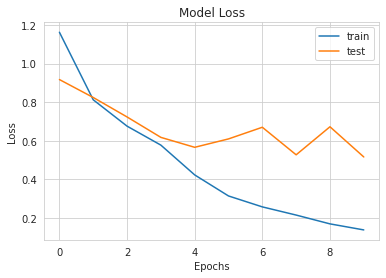

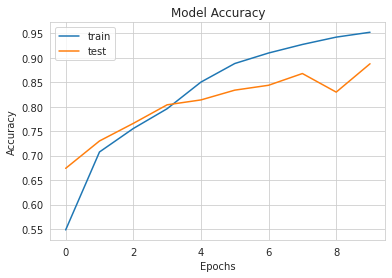

In [ ]:
# figure 1
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# figure 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

<h2>Prediksi model dengan menampilkan hasil akurasi dari model CNN</h2>

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the CNN model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 [==============================] - 2s 139ms/step - loss: 0.5159 - accuracy: 0.8880
Loss of the model is -  0.5158748626708984
16/16 [==============================] - 2s 140ms/step - loss: 0.5159 - accuracy: 0.8880
Accuracy of the CNN model is -  88.80000114440918 %


# **Membangun model dan melatih dataset dengan VGG-19**

In [ ]:
del x,y,data

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


<h2>Mengimport <em>packages</em> yang diperlukan dalam model VGG-19</h2>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.applications import VGG19

<h2>Membangun model VGG-19</h2>

In [ ]:
with strategy.scope():    
    trained_model = VGG19(input_shape=(100,100,3), include_top=False, weights="imagenet")

    for layer in trained_model.layers[:19]:
        layer.trainable = False

    model = Sequential([
        trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 2565      
Total params: 20,026,949
Trainable params: 4,722,181
Non-trainable params: 15,304,768
_________________________________________________________________


<h2>Menyesuaikan dengan set Pelatihan dan membuat prediksi pada set Validasi dengan melatih model (epocs) sebanyak 10x.</h2> 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(x_train,y_train, batch_size = 5 , epochs = 10 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/10
400/400 [==============================] - 307s 765ms/step - loss: 0.9263 - accuracy: 0.6853 - val_loss: 0.6545 - val_accuracy: 0.8100
Epoch 2/10
400/400 [==============================] - 304s 762ms/step - loss: 0.4857 - accuracy: 0.8595 - val_loss: 0.3499 - val_accuracy: 0.9120
Epoch 3/10
400/400 [==============================] - 304s 761ms/step - loss: 0.2607 - accuracy: 0.9173 - val_loss: 0.8947 - val_accuracy: 0.7780
Epoch 4/10
400/400 [==============================] - 304s 761ms/step - loss: 0.1598 - accuracy: 0.9501 - val_loss: 0.4727 - val_accuracy: 0.9040

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/10
400/400 [==============================] - 304s 761ms/step - loss: 0.0633 - accuracy: 0.9837 - val_loss: 0.3413 - val_accuracy: 0.9280
Epoch 6/10
400/400 [==============================] - 304s 761ms/step - loss: 0.0203 - accuracy: 0.9946 - val_loss: 0.3310 - val_accuracy: 0.9360
Epoch 7/10
400/400 [=======================

<h2>Mengevaluasi kinerja model</h2>

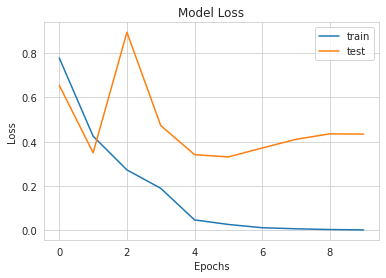

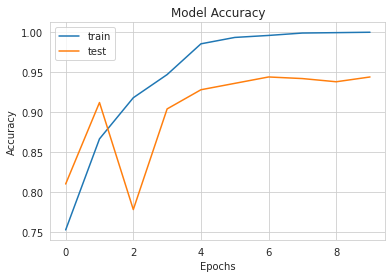

In [ ]:
# figure 1
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# figure 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

<h2>Prediksi model dengan menampilkan hasil akurasi dari model VGG-19</h2>

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the VGG-19 model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 [==============================] - 53s 3s/step - loss: 0.4342 - accuracy: 0.9440
Loss of the model is -  0.43421104550361633
16/16 [==============================] - 53s 3s/step - loss: 0.4342 - accuracy: 0.9440
Accuracy of the VGG19 model is -  94.40000057220459 %
